In [ ]:
from google.colab import drive
import os
import glob
import pandas as pd

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/DADS2/MADT/Chapter 9 - Customer Segmentation')  # Replace with the actual path to your folder




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_pattern = '*.xlsx'  # Replace with the appropriate file extension if needed
file_paths = glob.glob(file_pattern)

In [ ]:
file_paths

['transaction 2023.xlsx',
 'data member.xlsx',
 'transaction 2021.xlsx',
 'transaction 2022.xlsx',
 'Sum_data.xlsx']

In [ ]:
df1=pd.read_excel(file_paths[4])


In [ ]:
df1

,ent,first_date,last_date,total_qty,total_amt,no.visit,basket_size,join_date,no.join_year,visit_period,...,trans_online,trans_offline,CLTV,trans_price_Q1,trans_price_Q2,trans_price_Q3,trans_price_Q4,no.end_under,total_paid,disc_amt
0,TCCERZ13CE2,5/31/2022,5/31/2022,1,1589000,1,1589000.0,2022-01-05,1,0,...,NaN,1.00,637189000.0,NaN,NaN,NaN,1.000000,3.0,0,0.0
1,TCCER341EJF,5/31/2022,5/31/2022,1,1589000,1,1589000.0,2022-01-04,1,0,...,NaN,1.00,637189000.0,NaN,NaN,NaN,1.000000,NaN,0,0.0
2,TCCERZ1J31P,5/31/2022,5/31/2022,1,1589000,1,1589000.0,2022-01-05,1,0,...,NaN,1.00,637189000.0,NaN,NaN,NaN,1.000000,NaN,0,0.0
3,TCCER3QEWQK,5/31/2022,5/31/2022,1,1589000,1,1589000.0,2022-01-05,1,0,...,NaN,1.00,637189000.0,NaN,NaN,NaN,1.000000,NaN,0,0.0
4,TCCER3J34CY,5/31/2022,5/31/2022,1,1589000,1,1589000.0,2022-01-05,1,0,...,NaN,1.00,637189000.0,NaN,NaN,NaN,1.000000,4.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325159,TCCE4C4E13B,1/31/2022,4/14/2023,12,7488000,4,624000.0,2021-01-06,2,438,...,0.75,0.25,975312000.0,NaN,0.416667,0.416667,0.166667,NaN,1675000,0.0
325160,TCCE4C4ERR5,1/31/2022,4/14/2023,12,7488000,4,624000.0,2021-01-06,2,438,...,0.75,0.25,975312000.0,NaN,0.416667,0.416667,0.166667,NaN,1675000,0.0
325161,TCCE4C4ERW0,1/31/2022,4/14/2023,12,7488000,4,624000.0,2021-01-06,2,438,...,0.75,0.25,975312000.0,NaN,0.416667,0.416667,0.166667,NaN,1675000,0.0
325162,TCCE4C4EJEI,1/31/2022,4/14/2023,12,7488000,4,624000.0,2021-01-06,2,438,...,0.75,0.25,975312000.0,NaN,0.416667,0.416667,0.166667,NaN,1675000,0.0


In [ ]:
df1.columns

Index(['ent', 'first_date', 'last_date', 'total_qty', 'total_amt', 'no.visit',
       'basket_size', 'join_date', 'no.join_year', 'visit_period', 'MTBP',
       'order_size', 'visit_size', 'no.center', 'ARPU', 'trans_online',
       'trans_offline', 'CLTV', 'trans_price_Q1', 'trans_price_Q2',
       'trans_price_Q3', 'trans_price_Q4', 'no.end_under', 'total_paid',
       'disc_amt'],
      dtype='object')

In [ ]:
df1.isnull().sum()

ent                    0
first_date             0
last_date              0
total_qty              0
total_amt              0
no.visit               0
basket_size            0
join_date          61738
no.join_year           0
visit_period           0
MTBP                   0
order_size             0
visit_size             0
no.center              0
ARPU                   0
trans_online      116839
trans_offline     124719
CLTV                   0
trans_price_Q1     89236
trans_price_Q2     90931
trans_price_Q3    131487
trans_price_Q4    163836
no.end_under      259806
total_paid             0
disc_amt              18
dtype: int64

In [ ]:
# Copy df1 to df_cleaned
df_cleaned = df1.copy()

# Fill NaN values in df_cleaned
df_cleaned['join_date'].fillna(df_cleaned['join_date'].mode()[0], inplace=True)
df_cleaned.fillna({
    'trans_online': 0,
    'trans_offline': 0,
    'trans_price_Q1': 0,
    'trans_price_Q2': 0,
    'trans_price_Q3': 0,
    'trans_price_Q4': 0,
    'no.end_under': 0,
    'disc_amt': 0
}, inplace=True)


In [ ]:
df_cleaned

,ent,first_date,last_date,total_qty,total_amt,no.visit,basket_size,join_date,no.join_year,visit_period,...,trans_online,trans_offline,CLTV,trans_price_Q1,trans_price_Q2,trans_price_Q3,trans_price_Q4,no.end_under,total_paid,disc_amt
0,TCCERZ13CE2,5/31/2022,5/31/2022,1,1589000,1,1589000.0,2022-01-05,1,0,...,0.00,1.00,637189000.0,0.0,0.000000,0.000000,1.000000,3.0,0,0.0
1,TCCER341EJF,5/31/2022,5/31/2022,1,1589000,1,1589000.0,2022-01-04,1,0,...,0.00,1.00,637189000.0,0.0,0.000000,0.000000,1.000000,0.0,0,0.0
2,TCCERZ1J31P,5/31/2022,5/31/2022,1,1589000,1,1589000.0,2022-01-05,1,0,...,0.00,1.00,637189000.0,0.0,0.000000,0.000000,1.000000,0.0,0,0.0
3,TCCER3QEWQK,5/31/2022,5/31/2022,1,1589000,1,1589000.0,2022-01-05,1,0,...,0.00,1.00,637189000.0,0.0,0.000000,0.000000,1.000000,0.0,0,0.0
4,TCCER3J34CY,5/31/2022,5/31/2022,1,1589000,1,1589000.0,2022-01-05,1,0,...,0.00,1.00,637189000.0,0.0,0.000000,0.000000,1.000000,4.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325159,TCCE4C4E13B,1/31/2022,4/14/2023,12,7488000,4,624000.0,2021-01-06,2,438,...,0.75,0.25,975312000.0,0.0,0.416667,0.416667,0.166667,0.0,1675000,0.0
325160,TCCE4C4ERR5,1/31/2022,4/14/2023,12,7488000,4,624000.0,2021-01-06,2,438,...,0.75,0.25,975312000.0,0.0,0.416667,0.416667,0.166667,0.0,1675000,0.0
325161,TCCE4C4ERW0,1/31/2022,4/14/2023,12,7488000,4,624000.0,2021-01-06,2,438,...,0.75,0.25,975312000.0,0.0,0.416667,0.416667,0.166667,0.0,1675000,0.0
325162,TCCE4C4EJEI,1/31/2022,4/14/2023,12,7488000,4,624000.0,2021-01-06,2,438,...,0.75,0.25,975312000.0,0.0,0.416667,0.416667,0.166667,0.0,1675000,0.0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
cols_to_cluster = ['total_qty', 'total_amt', 'no.visit', 'basket_size', 'visit_period',
                   'MTBP', 'order_size', 'visit_size', 'no.center', 'ARPU',
                   'trans_online', 'trans_offline', 'CLTV', 'trans_price_Q1',
                   'trans_price_Q2', 'trans_price_Q3', 'trans_price_Q4', 'no.end_under','total_paid', 'disc_amt']

df_clustering = df_cleaned[cols_to_cluster]

# Standardize
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# KMeans clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add clusters to original dataframe
df_cleaned['Cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df_cleaned

,ent,first_date,last_date,total_qty,total_amt,no.visit,basket_size,join_date,no.join_year,visit_period,...,trans_offline,CLTV,trans_price_Q1,trans_price_Q2,trans_price_Q3,trans_price_Q4,no.end_under,total_paid,disc_amt,Cluster
0,TCCERZ13CE2,5/31/2022,5/31/2022,1,1589000,1,1589000.0,2022-01-05,1,0,...,1.00,637189000.0,0.0,0.000000,0.000000,1.000000,3.0,0,0.0,1
1,TCCER341EJF,5/31/2022,5/31/2022,1,1589000,1,1589000.0,2022-01-04,1,0,...,1.00,637189000.0,0.0,0.000000,0.000000,1.000000,0.0,0,0.0,1
2,TCCERZ1J31P,5/31/2022,5/31/2022,1,1589000,1,1589000.0,2022-01-05,1,0,...,1.00,637189000.0,0.0,0.000000,0.000000,1.000000,0.0,0,0.0,1
3,TCCER3QEWQK,5/31/2022,5/31/2022,1,1589000,1,1589000.0,2022-01-05,1,0,...,1.00,637189000.0,0.0,0.000000,0.000000,1.000000,0.0,0,0.0,1
4,TCCER3J34CY,5/31/2022,5/31/2022,1,1589000,1,1589000.0,2022-01-05,1,0,...,1.00,637189000.0,0.0,0.000000,0.000000,1.000000,4.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325159,TCCE4C4E13B,1/31/2022,4/14/2023,12,7488000,4,624000.0,2021-01-06,2,438,...,0.25,975312000.0,0.0,0.416667,0.416667,0.166667,0.0,1675000,0.0,1
325160,TCCE4C4ERR5,1/31/2022,4/14/2023,12,7488000,4,624000.0,2021-01-06,2,438,...,0.25,975312000.0,0.0,0.416667,0.416667,0.166667,0.0,1675000,0.0,1
325161,TCCE4C4ERW0,1/31/2022,4/14/2023,12,7488000,4,624000.0,2021-01-06,2,438,...,0.25,975312000.0,0.0,0.416667,0.416667,0.166667,0.0,1675000,0.0,1
325162,TCCE4C4EJEI,1/31/2022,4/14/2023,12,7488000,4,624000.0,2021-01-06,2,438,...,0.25,975312000.0,0.0,0.416667,0.416667,0.166667,0.0,1675000,0.0,1


In [ ]:
df_cleaned.columns

Index(['ent', 'first_date', 'last_date', 'total_qty', 'total_amt', 'no.visit',
       'basket_size', 'join_date', 'no.join_year', 'visit_period', 'MTBP',
       'order_size', 'visit_size', 'no.center', 'ARPU', 'trans_online',
       'trans_offline', 'CLTV', 'trans_price_Q1', 'trans_price_Q2',
       'trans_price_Q3', 'trans_price_Q4', 'no.end_under', 'total_paid',
       'disc_amt', 'Cluster'],
      dtype='object')

In [ ]:
columnss=['ent','total_qty', 'total_amt', 'no.visit', 'basket_size', 'visit_period',
                   'MTBP', 'order_size', 'visit_size', 'no.center', 'ARPU',
                   'trans_online', 'trans_offline', 'CLTV', 'trans_price_Q1',
                   'trans_price_Q2', 'trans_price_Q3', 'trans_price_Q4', 'total_paid','no.end_under', 'disc_amt','Cluster']

In [ ]:
df_kmean = df_cleaned[columnss]

In [ ]:
df_kmean

,ent,total_qty,total_amt,no.visit,basket_size,visit_period,MTBP,order_size,visit_size,no.center,...,trans_offline,CLTV,trans_price_Q1,trans_price_Q2,trans_price_Q3,trans_price_Q4,total_paid,no.end_under,disc_amt,Cluster
0,TCCERZ13CE2,1,1589000,1,1589000.0,0,0,1589000.0,1.0,1,...,1.00,637189000.0,0.0,0.000000,0.000000,1.000000,0,3.0,0.0,1
1,TCCER341EJF,1,1589000,1,1589000.0,0,0,1589000.0,1.0,1,...,1.00,637189000.0,0.0,0.000000,0.000000,1.000000,0,0.0,0.0,1
2,TCCERZ1J31P,1,1589000,1,1589000.0,0,0,1589000.0,1.0,1,...,1.00,637189000.0,0.0,0.000000,0.000000,1.000000,0,0.0,0.0,1
3,TCCER3QEWQK,1,1589000,1,1589000.0,0,0,1589000.0,1.0,1,...,1.00,637189000.0,0.0,0.000000,0.000000,1.000000,0,0.0,0.0,1
4,TCCER3J34CY,1,1589000,1,1589000.0,0,0,1589000.0,1.0,1,...,1.00,637189000.0,0.0,0.000000,0.000000,1.000000,0,4.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325159,TCCE4C4E13B,12,7488000,4,624000.0,438,110,1872000.0,3.0,3,...,0.25,975312000.0,0.0,0.416667,0.416667,0.166667,1675000,0.0,0.0,1
325160,TCCE4C4ERR5,12,7488000,4,624000.0,438,110,1872000.0,3.0,3,...,0.25,975312000.0,0.0,0.416667,0.416667,0.166667,1675000,0.0,0.0,1
325161,TCCE4C4ERW0,12,7488000,4,624000.0,438,110,1872000.0,3.0,3,...,0.25,975312000.0,0.0,0.416667,0.416667,0.166667,1675000,0.0,0.0,1
325162,TCCE4C4EJEI,12,7488000,4,624000.0,438,110,1872000.0,3.0,3,...,0.25,975312000.0,0.0,0.416667,0.416667,0.166667,1675000,0.0,0.0,1


In [ ]:
cluster_summary = df_kmean.groupby('Cluster').agg({
    'total_qty': 'mean',
    'total_amt': 'mean',
    'no.visit': 'mean',
    'basket_size': 'mean',
    'visit_period': 'mean',
    'MTBP': 'mean',
    'order_size': 'mean',
    'visit_size': 'mean',
    'no.center': 'mean',
    'ARPU': 'mean',
    'trans_online': 'mean',
    'trans_offline': 'mean',
    'CLTV': 'mean',
    'trans_price_Q1': 'mean',
    'trans_price_Q2': 'mean',
    'trans_price_Q3': 'mean',
    'trans_price_Q4': 'mean',
    'no.end_under': 'mean',
    'total_paid': 'mean',
    'disc_amt': 'mean'
}).reset_index()

print(cluster_summary)


   Cluster   total_qty     total_amt   no.visit    basket_size  visit_period  \
0        0    9.350294  2.762091e+06   3.881548  318064.369466    113.773606   
1        1    5.072338  2.357420e+06   1.364886  659356.534658     19.996902   
2        2  116.542168  3.215358e+07  32.083693  354020.275233    483.684133   

        MTBP    order_size  visit_size  no.center  ...  trans_online  \
0  22.656295  6.817734e+05    2.366966   1.905750  ...      0.632438   
1   5.480049  1.733744e+06    3.766309   1.105875  ...      0.436913   
2  19.079013  1.157214e+06    3.599656   6.490135  ...      0.638654   

   trans_offline          CLTV  trans_price_Q1  trans_price_Q2  \
0       0.396525  2.488781e+08        0.372496        0.355458   
1       0.590212  6.017815e+08        0.207612        0.273745   
2       0.394286  5.975207e+08        0.355925        0.329819   

   trans_price_Q3  trans_price_Q4  no.end_under    total_paid      disc_amt  
0        0.206817        0.065230      0.854303

In [ ]:
cluster_summary

,Cluster,total_qty,total_amt,no.visit,basket_size,visit_period,MTBP,order_size,visit_size,no.center,...,trans_online,trans_offline,CLTV,trans_price_Q1,trans_price_Q2,trans_price_Q3,trans_price_Q4,no.end_under,total_paid,disc_amt
0,0,9.350294,2.762091e+06,3.881548,318064.369466,113.773606,22.656295,6.817734e+05,2.366966,1.905750,...,0.632438,0.396525,2.488781e+08,0.372496,0.355458,0.206817,0.065230,0.854303,2.608366e+05,6.888311e+04
1,1,5.072338,2.357420e+06,1.364886,659356.534658,19.996902,5.480049,1.733744e+06,3.766309,1.105875,...,0.436913,0.590212,6.017815e+08,0.207612,0.273745,0.236594,0.282049,0.475043,1.362303e+05,1.080910e+05
2,2,116.542168,3.215358e+07,32.083693,354020.275233,483.684133,19.079013,1.157214e+06,3.599656,6.490135,...,0.638654,0.394286,5.975207e+08,0.355925,0.329819,0.239774,0.074483,18.261907,4.137974e+06,1.636063e+06


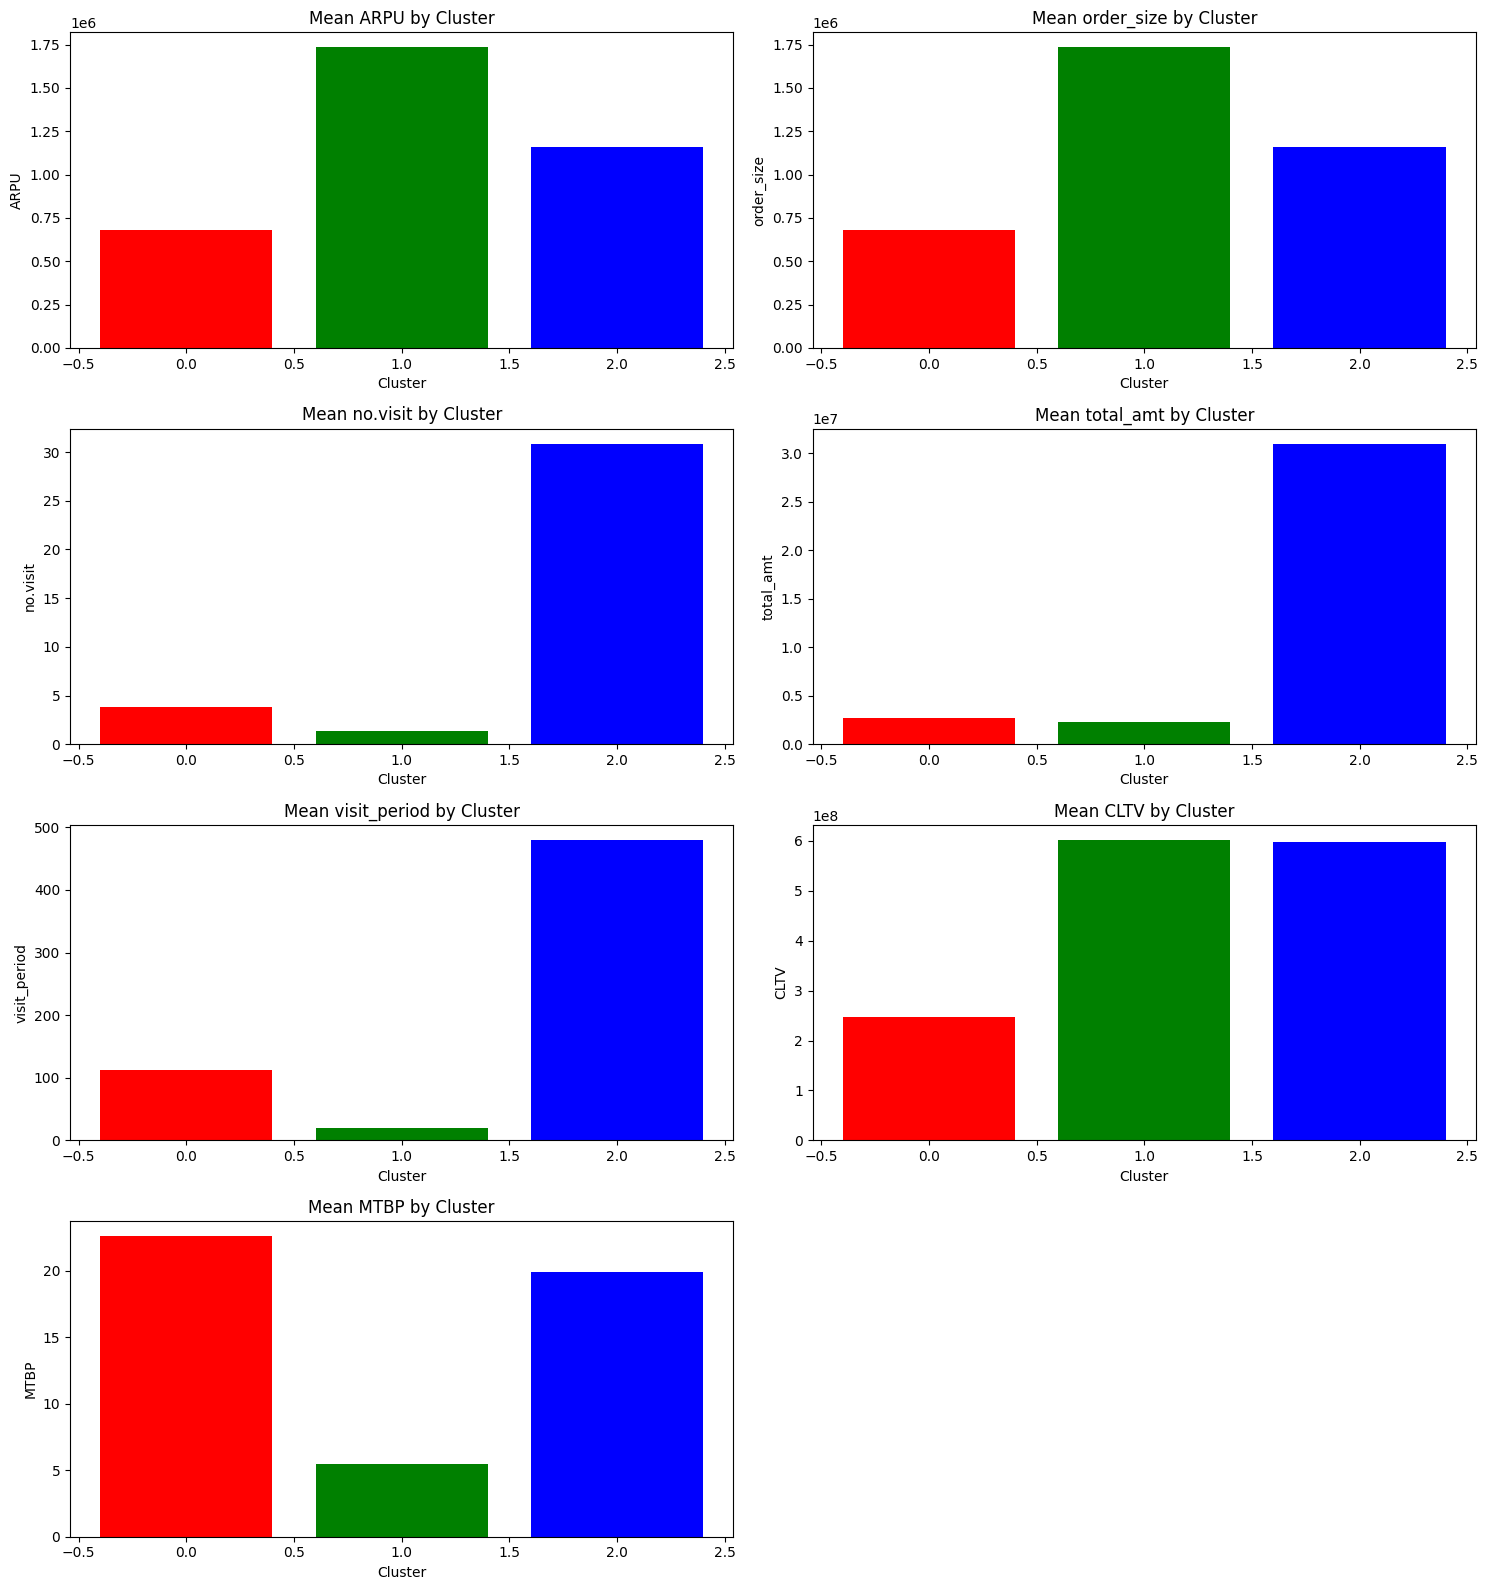

In [ ]:
import matplotlib.pyplot as plt

# Selected features
features = ['ARPU', 'order_size', 'no.visit', 'total_amt', 'visit_period', 'CLTV', 'MTBP']

# Number of rows and columns for subplots
n_rows = (len(features) + 1) // 2  # This will handle both even and odd number of features
n_cols = 2

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 4 * n_rows))

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    axes[row, col].bar(cluster_summary['Cluster'], cluster_summary[feature], color=['red', 'green', 'blue'])
    axes[row, col].set_title(f'Mean {feature} by Cluster')
    axes[row, col].set_xlabel('Cluster')
    axes[row, col].set_ylabel(feature)

# Remove any unused subplots
if len(features) % 2:
    fig.delaxes(axes[n_rows-1, 1])

plt.tight_layout()
plt.show()


In [ ]:
cols_to_cluster = ['total_qty', 'total_amt', 'no.visit', 'basket_size', 'visit_period',
                   'MTBP', 'order_size', 'visit_size', 'no.center', 'ARPU',
                   'trans_online', 'trans_offline', 'CLTV']


In [ ]:
df_singleview = df_cleaned[cols_to_cluster]


In [ ]:
df_singleview

,total_qty,total_amt,no.visit,basket_size,visit_period,MTBP,order_size,visit_size,no.center,ARPU,trans_online,trans_offline,CLTV
0,1,1589000,1,1589000.0,0,0,1589000.0,1.0,1,1589000.0,0.00,1.00,637189000.0
1,1,1589000,1,1589000.0,0,0,1589000.0,1.0,1,1589000.0,0.00,1.00,637189000.0
2,1,1589000,1,1589000.0,0,0,1589000.0,1.0,1,1589000.0,0.00,1.00,637189000.0
3,1,1589000,1,1589000.0,0,0,1589000.0,1.0,1,1589000.0,0.00,1.00,637189000.0
4,1,1589000,1,1589000.0,0,0,1589000.0,1.0,1,1589000.0,0.00,1.00,637189000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325159,12,7488000,4,624000.0,438,110,1872000.0,3.0,3,1872000.0,0.75,0.25,975312000.0
325160,12,7488000,4,624000.0,438,110,1872000.0,3.0,3,1872000.0,0.75,0.25,975312000.0
325161,12,7488000,4,624000.0,438,110,1872000.0,3.0,3,1872000.0,0.75,0.25,975312000.0
325162,12,7488000,4,624000.0,438,110,1872000.0,3.0,3,1872000.0,0.75,0.25,975312000.0


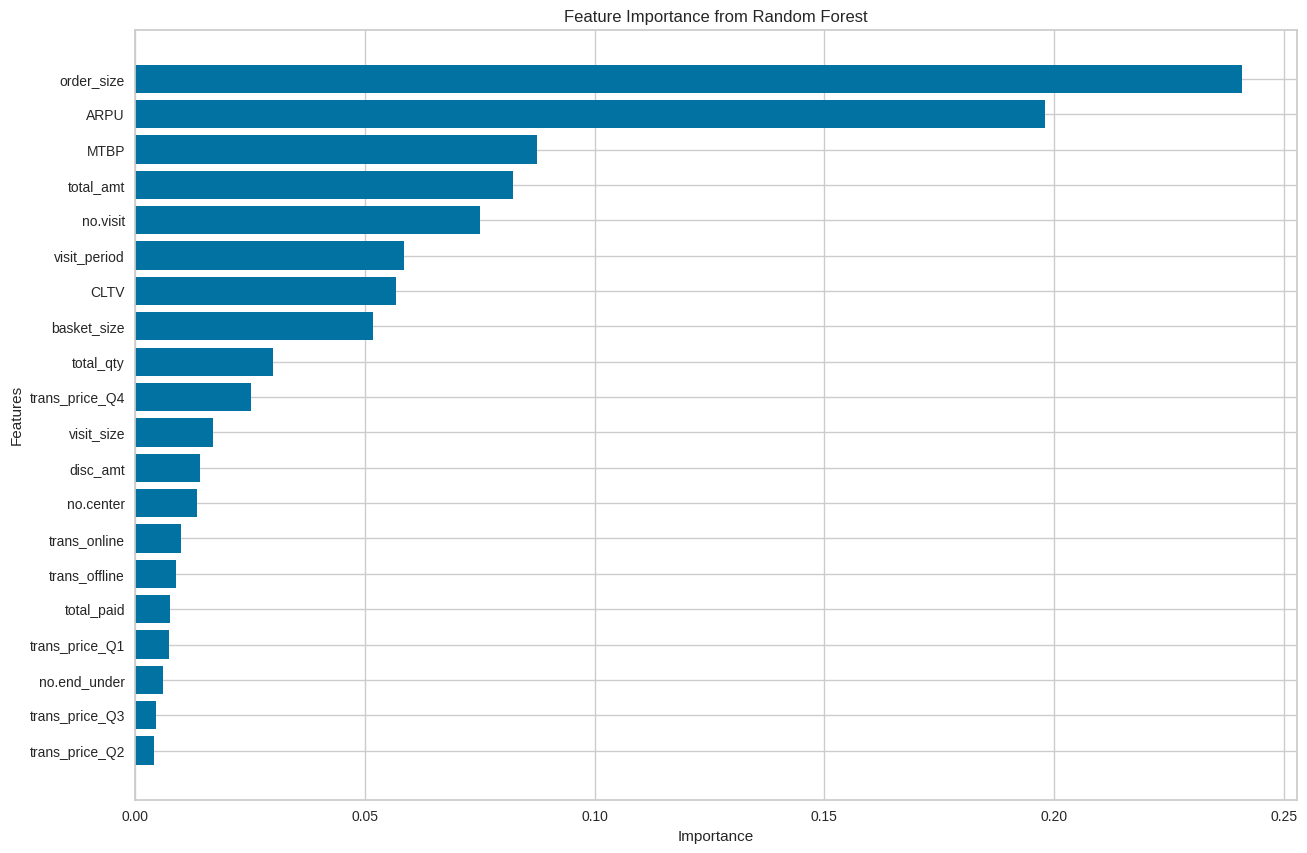

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Your selected columns
cols_to_cluster = columnss=['total_qty', 'total_amt', 'no.visit', 'basket_size', 'visit_period',
                   'MTBP', 'order_size', 'visit_size', 'no.center', 'ARPU',
                   'trans_online', 'trans_offline', 'CLTV', 'trans_price_Q1',
                   'trans_price_Q2', 'trans_price_Q3', 'trans_price_Q4','no.end_under', 'total_paid', 'disc_amt']

# Make a copy of the dataframe
df_clustering_copy = df_cleaned[cols_to_cluster].copy()

# Scale the data
scaler = StandardScaler()
df_scaled_copy = scaler.fit_transform(df_clustering_copy)

# Create a new instance of RandomForestClassifier
rf_copy = RandomForestClassifier(random_state=42)

# Train this instance with the scaled data
rf_copy.fit(df_scaled_copy, df_cleaned['Cluster'])

# Extract feature importances
feature_imp_copy = rf_copy.feature_importances_

# Create a dataframe for feature importances
df_feature_copy = pd.DataFrame({'Feature': cols_to_cluster, 'Importance': feature_imp_copy})

# Sort dataframe by importance
df_feature_copy = df_feature_copy.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(15, 10))
plt.barh(df_feature_copy['Feature'], df_feature_copy['Importance'], align='center')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Highest importance at top
plt.show()


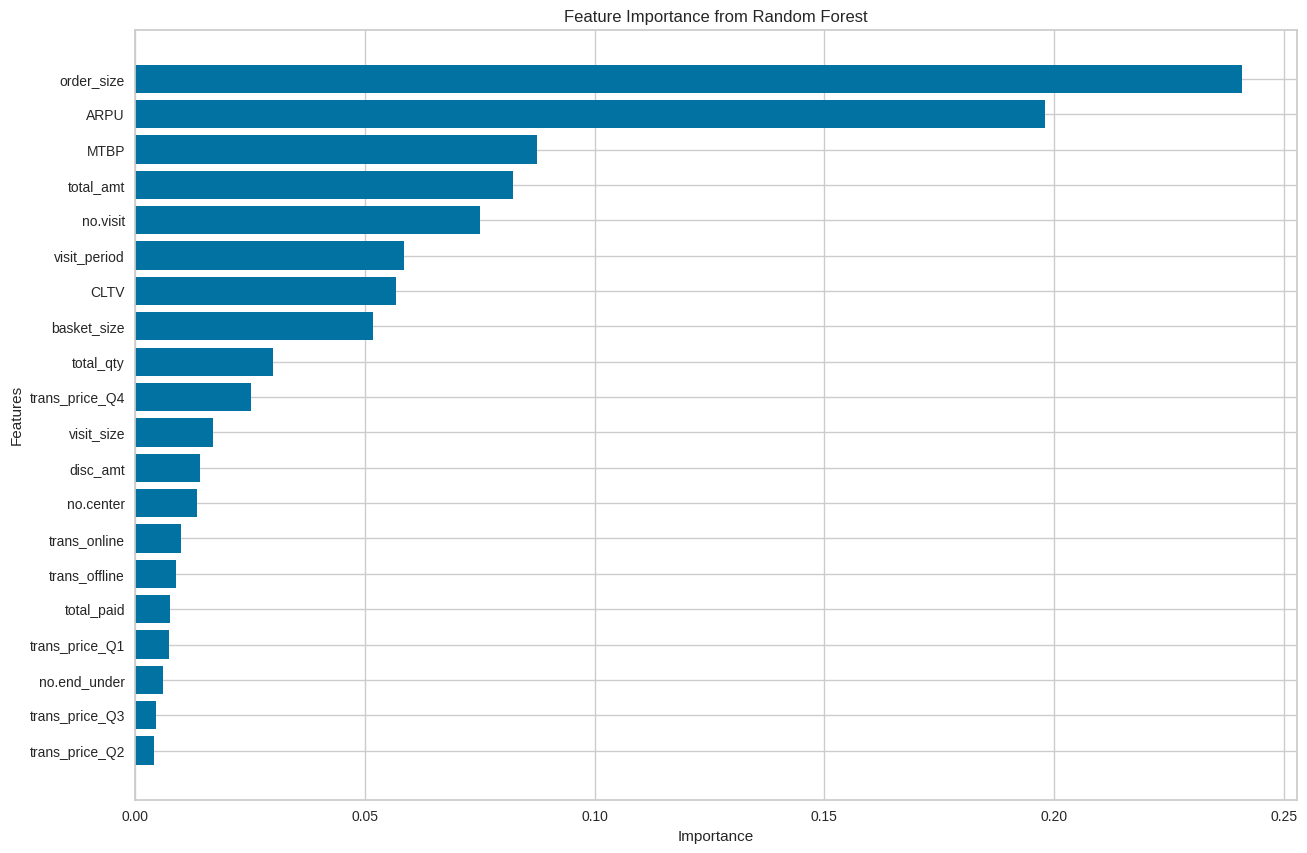

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from joblib import dump
import matplotlib.pyplot as plt
import pandas as pd
cols_to_cluster = ['total_qty', 'total_amt', 'no.visit', 'basket_size', 'visit_period',
                   'MTBP', 'order_size', 'visit_size', 'no.center', 'ARPU',
                   'trans_online', 'trans_offline', 'CLTV', 'trans_price_Q1',
                   'trans_price_Q2', 'trans_price_Q3', 'trans_price_Q4','no.end_under', 'total_paid', 'disc_amt']
# Select relevant columns
df_clustering = df_cleaned[cols_to_cluster]

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# Train the Random Forest on scaled data with clusters as the target
rf = RandomForestClassifier(random_state=42)
rf.fit(df_scaled, df_cleaned['Cluster'])

# Save the model to a file
dump(rf, 'random_forest_model.pkl')

# Extract feature importances
feature_imp = rf.feature_importances_

# Create a dataframe for feature importances
df_feature = pd.DataFrame({'Feature': cols_to_cluster, 'Importance': feature_imp})

# Sort dataframe by importance
df_feature = df_feature.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(15, 10))
plt.barh(df_feature['Feature'], df_feature['Importance'], align='center')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Highest importance at top
plt.show()


In [ ]:
df_feature

,Feature,Importance
6,order_size,0.240813
9,ARPU,0.197893
5,MTBP,0.087525
1,total_amt,0.082199
2,no.visit,0.075078
4,visit_period,0.058655
12,CLTV,0.056880
3,basket_size,0.051793
0,total_qty,0.030138
16,trans_price_Q4,0.025219


In [ ]:
df_cleaned.sample(10)

,ent,first_date,last_date,total_qty,total_amt,no.visit,basket_size,join_date,no.join_year,visit_period,...,trans_offline,CLTV,trans_price_Q1,trans_price_Q2,trans_price_Q3,trans_price_Q4,no.end_under,total_paid,disc_amt,Cluster
49623,TCCE1QEZQW5,4/30/2022,4/30/2022,4,1694000,1,4.235000e+05,2021-01-10,2,0,...,1.000000,7.318080e+08,0.250000,0.500000,0.000000,0.250000,2.0,0,0.0,1
207351,TCC4QZ1QCQ5,6/28/2022,6/30/2022,9,1691000,2,1.878889e+05,2020-01-10,3,2,...,0.500000,3.153715e+08,0.250000,0.562500,0.187500,0.000000,2.0,0,7500.0,0
19494,TCCEERW3ZQ5,11/30/2022,11/30/2022,2,1636000,1,8.180000e+05,2022-01-11,1,0,...,1.000000,3.566480e+08,0.500000,0.000000,0.000000,0.500000,0.0,0,0.0,1
321917,TCCEQ1W13ZB,6/29/2023,6/29/2023,1,1734000,1,1.734000e+06,2023-01-06,0,0,...,1.000000,1.213800e+07,0.000000,0.000000,0.000000,1.000000,0.0,1734000,0.0,1
61095,TCCERERWQJ5,1/31/2022,1/31/2022,8,1593000,1,1.991250e+05,2022-01-11,124,0,...,1.000000,8.299530e+08,0.875000,0.000000,0.000000,0.125000,0.0,0,0.0,1
268491,TCCER3ZCJ1U,11/19/2022,11/21/2022,4,1413000,2,3.532500e+05,2022-01-05,1,2,...,0.000000,1.617885e+08,0.750000,0.000000,0.000000,0.250000,0.0,0,2500.0,0
150730,TCCEJ1E33EF,9/29/2022,9/29/2022,1,1654000,1,1.654000e+06,2022-01-09,1,0,...,0.000000,4.631200e+08,0.000000,0.000000,0.000000,1.000000,0.0,0,0.0,1
166531,TCCERCJC1QB,6/25/2022,11/18/2022,17,4992000,7,2.936471e+05,2021-01-12,2,146,...,0.428571,2.681417e+08,0.470588,0.235294,0.235294,0.058824,0.0,0,7500.0,0
252753,TCCERWZZEJY,4/26/2022,4/26/2022,3,1644000,1,5.480000e+05,2022-01-04,1,0,...,0.000000,7.167840e+08,0.333333,0.000000,0.333333,0.333333,0.0,0,2500.0,1
254387,TCCEJWCZ1R2,11/30/2022,11/30/2022,3,1760000,1,5.866667e+05,2022-01-11,1,0,...,0.000000,3.836800e+08,0.333333,0.000000,0.333333,0.333333,0.0,0,2500.0,1


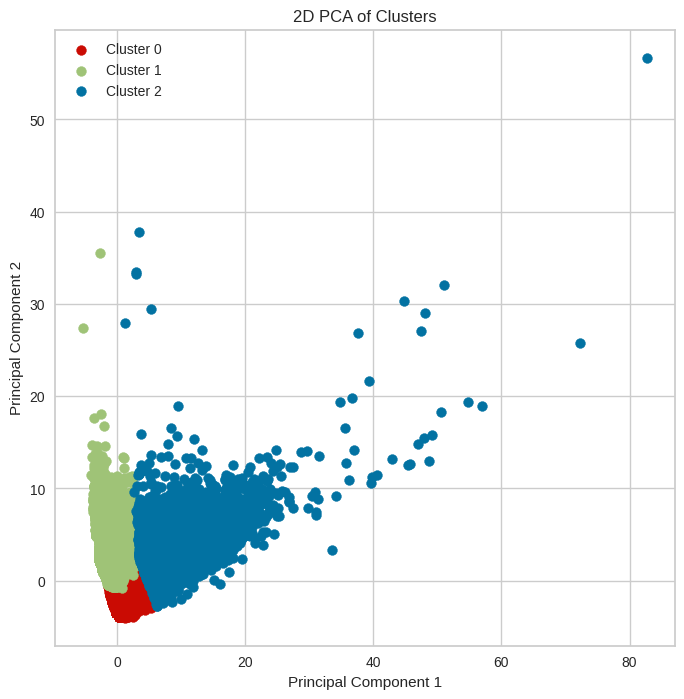

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Standardize
cols_to_cluster = ['total_qty', 'total_amt', 'no.visit', 'basket_size', 'visit_period',
                   'MTBP', 'order_size', 'visit_size', 'no.center', 'ARPU',
                   'trans_online', 'trans_offline', 'CLTV', 'trans_price_Q1',
                   'trans_price_Q2', 'trans_price_Q3', 'trans_price_Q4','no.end_under','total_paid', 'disc_amt']
df_clustering = df_cleaned[cols_to_cluster]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# Apply PCA and reduce to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with the principal components and clusters
df_pca = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
df_pca['Cluster'] = clusters

# Plot
plt.figure(figsize=(8, 8))
colors = ['r', 'g', 'b']  # You can expand this if more clusters
for cluster_num in set(clusters):
    subset = df_pca[df_pca['Cluster'] == cluster_num]
    plt.scatter(subset['PC1'], subset['PC2'], s=50, c=colors[cluster_num], label=f'Cluster {cluster_num}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Clusters')
plt.legend()
plt.show()


In [ ]:
cluster_counts = df_cleaned['Cluster'].value_counts()
print(cluster_counts)


0    159660
1    154607
2     10897
Name: Cluster, dtype: int64


In [ ]:
# Extract data points from cluster 2 into a new dataframe
df_cluster2 = df_cleaned[df_cleaned['Cluster'] == 2].copy()

# Extract relevant features from cluster 2 data
df_clustering2 = df_cluster2[cols_to_cluster]

# Standardize the data for cluster 2
df_scaled2 = scaler.transform(df_clustering2)  # Note: We use transform instead of fit_transform because we're using the same scaler object

# KMeans clustering with k=3 for cluster 2 data
kmeans2 = KMeans(n_clusters=3, random_state=42)
clusters2 = kmeans2.fit_predict(df_scaled2)

# Add the new clusters to the cluster 2 dataframe
df_cluster2['Sub_Cluster'] = clusters2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df_cluster2

,ent,first_date,last_date,total_qty,total_amt,no.visit,basket_size,join_date,no.join_year,visit_period,...,CLTV,trans_price_Q1,trans_price_Q2,trans_price_Q3,trans_price_Q4,no.end_under,total_paid,disc_amt,Cluster,Sub_Cluster
62724,H4C4W31K,8/15/2022,8/15/2022,10,390000,1,39000.000000,1987-01-05,36,0,...,1.267500e+08,1.000000,0.000000,0.000000,0.000000,211.0,0,0.0,2,1
69913,BCE1WREP,12/29/2022,2023-03-01 00:00:00,6,444000,2,74000.000000,2004-01-04,19,5,...,4.195800e+07,0.600000,0.100000,0.300000,0.000000,260.0,0,0.0,2,1
85417,TCC4R441Q1Y,2022-04-01 00:00:00,12/21/2022,1696,4240000,8,2500.000000,2022-01-11,124,351,...,2.904400e+08,0.992393,0.005851,0.001755,0.000000,0.0,0,0.0,2,0
85654,TCC41E4Q1RU,2022-04-01 00:00:00,6/24/2023,72,39810000,32,552916.666667,2019-01-08,4,536,...,6.817462e+08,0.206349,0.333333,0.333333,0.126984,1.0,0,0.0,2,0
85676,TEJRZQRY,1/28/2022,6/24/2023,102,25375000,36,248774.509804,2003-01-11,20,512,...,3.693472e+08,0.330709,0.582677,0.062992,0.023622,22.0,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324024,TCC4W3CWJRY,2/19/2022,6/17/2023,81,22690000,19,280123.456790,2020-01-12,3,483,...,5.994937e+08,0.252427,0.456311,0.281553,0.009709,32.0,1610000,0.0,2,0
324068,TCC41W43Z1U,2022-12-01 00:00:00,6/26/2023,58,37632800,29,648841.379310,2020-01-03,3,530,...,7.007487e+08,0.155844,0.272727,0.233766,0.337662,3.0,305000,0.0,2,0
324164,TCCE4ZZ1QJ2,1/25/2022,2023-09-06 00:00:00,69,37492000,14,543362.318841,2021-01-07,2,500,...,1.411306e+09,0.000000,0.130435,0.826087,0.043478,1.0,6954000,0.0,2,0
324172,TJWC4Z3B,1/26/2022,2/28/2023,210,14880000,8,70857.142857,2006-01-09,17,398,...,9.783600e+08,0.858086,0.042904,0.085809,0.013201,1.0,11494000,0.0,2,0


In [ ]:
df_cluster2.columns

Index(['ent', 'first_date', 'last_date', 'total_qty', 'total_amt', 'no.visit',
       'basket_size', 'join_date', 'no.join_year', 'visit_period', 'MTBP',
       'order_size', 'visit_size', 'no.center', 'ARPU', 'trans_online',
       'trans_offline', 'CLTV', 'trans_price_Q1', 'trans_price_Q2',
       'trans_price_Q3', 'trans_price_Q4', 'no.end_under', 'total_paid',
       'disc_amt', 'Cluster', 'Sub_Cluster'],
      dtype='object')

In [ ]:
df_cluster2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10897 entries, 62724 to 324240
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ent             10897 non-null  object        
 1   first_date      10897 non-null  object        
 2   last_date       10897 non-null  object        
 3   total_qty       10897 non-null  int64         
 4   total_amt       10897 non-null  int64         
 5   no.visit        10897 non-null  int64         
 6   basket_size     10897 non-null  float64       
 7   join_date       10897 non-null  datetime64[ns]
 8   no.join_year    10897 non-null  int64         
 9   visit_period    10897 non-null  int64         
 10  MTBP            10897 non-null  int64         
 11  order_size      10897 non-null  float64       
 12  visit_size      10897 non-null  float64       
 13  no.center       10897 non-null  int64         
 14  ARPU            10897 non-null  float64       
 1

In [ ]:
cols_to_cluster = ['total_qty', 'total_amt', 'no.visit', 'basket_size', 'visit_period',
                   'MTBP', 'order_size', 'visit_size', 'no.center', 'ARPU',
                   'trans_online', 'trans_offline', 'CLTV', 'trans_price_Q1',
                   'trans_price_Q2', 'trans_price_Q3', 'trans_price_Q4','no.end_under', 'total_paid', 'disc_amt']

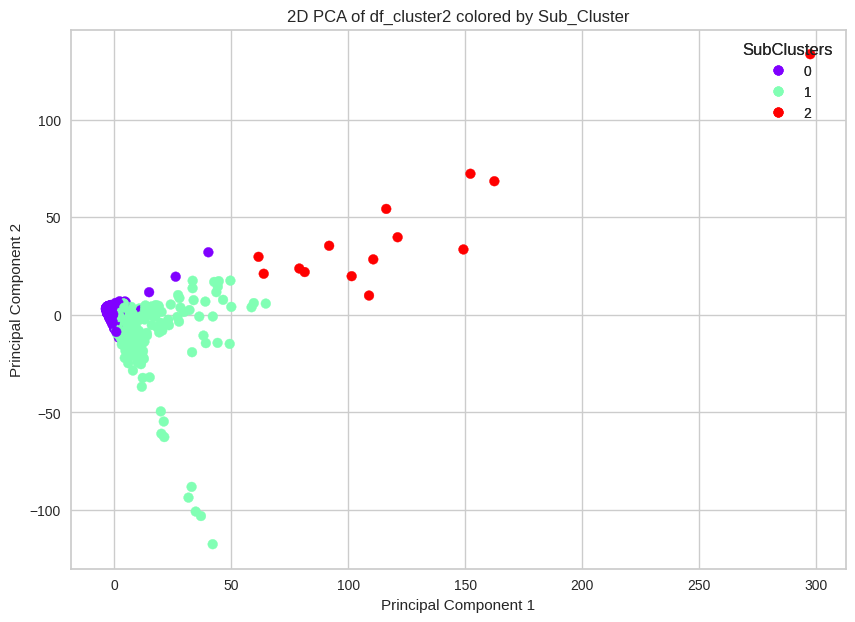

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Take only the numeric columns we want to use for clustering
X = df_cluster2[cols_to_cluster]

# Standardize the data
X_scaled = scaler.transform(X)

# Apply PCA and transform the data to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_cluster2['Sub_Cluster'], cmap='rainbow')

# Creating a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="upper right", title="SubClusters")
plt.gca().add_artist(legend1)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA of df_cluster2 colored by Sub_Cluster")
plt.show()


In [ ]:
cluster_summary2 = df_cluster2.groupby('Sub_Cluster').agg({
    'total_qty': 'mean',
    'total_amt': 'mean',
    'no.visit': 'mean',
    'basket_size': 'mean',
    'visit_period': 'mean',
    'MTBP': 'mean',
    'order_size': 'mean',
    'visit_size': 'mean',
    'no.center': 'mean',
    'ARPU': 'mean',
    'trans_online': 'mean',
    'trans_offline': 'mean',
    'CLTV': 'mean',
    'trans_price_Q1': 'mean',
    'trans_price_Q2': 'mean',
    'trans_price_Q3': 'mean',
    'trans_price_Q4': 'mean',
    'total_paid': 'mean',
    'disc_amt': 'mean'
}).reset_index()

print(cluster_summary2)


   Sub_Cluster    total_qty     total_amt    no.visit    basket_size  \
0            0    76.753175  2.534862e+07   25.195702  359386.110918   
1            1  8444.142857  6.694066e+07  143.142857    9002.584912   
2            2   187.701708  5.049834e+07   50.081594  345321.230234   

   visit_period       MTBP    order_size  visit_size  no.center          ARPU  \
0    468.823076  21.984913  1.151874e+06    3.321753   5.553674  1.151874e+06   
1    541.785714   7.785714  9.863782e+05  126.393577   5.428571  9.863782e+05   
2    519.046300  12.719165  1.197019e+06    3.835137   9.140038  1.197019e+06   

   trans_online  trans_offline          CLTV  trans_price_Q1  trans_price_Q2  \
0      0.653509       0.377812  5.853960e+08        0.344734        0.333181   
1      0.186113       0.844907  5.371725e+08        0.991845        0.004190   
2      0.622008       0.416361  6.361898e+08        0.382959        0.316620   

   trans_price_Q3  trans_price_Q4    total_paid      disc_amt  
0

In [ ]:
cluster_summary2

,Sub_Cluster,total_qty,total_amt,no.visit,basket_size,visit_period,MTBP,order_size,visit_size,no.center,ARPU,trans_online,trans_offline,CLTV,trans_price_Q1,trans_price_Q2,trans_price_Q3,trans_price_Q4,total_paid,disc_amt
0,0,76.753175,2.534862e+07,25.195702,359386.110918,468.823076,21.984913,1.151874e+06,3.321753,5.553674,1.151874e+06,0.653509,0.377812,5.853960e+08,0.344734,0.333181,0.246005,0.076080,2.674767e+06,1.148969e+06
1,1,8444.142857,6.694066e+07,143.142857,9002.584912,541.785714,7.785714,9.863782e+05,126.393577,5.428571,9.863782e+05,0.186113,0.844907,5.371725e+08,0.991845,0.004190,0.003000,0.000964,1.014568e+07,3.167607e+06
2,2,187.701708,5.049834e+07,50.081594,345321.230234,519.046300,12.719165,1.197019e+06,3.835137,9.140038,1.197019e+06,0.622008,0.416361,6.361898e+08,0.382959,0.316620,0.228427,0.071994,8.639439e+06,2.971290e+06


In [ ]:
# Export df_cluster2 to CSV
df_cluster2.to_csv("df_cluster2.csv", index=False)
# Export df_cluster2 summary to CSV





In [ ]:
#cluster_summary2
cluster_summary2.to_csv("cluster_summary2.csv", index=False)

In [ ]:
cluster_summary.to_csv("cluster_summary.csv", index=False)

Cluster movement

In [ ]:
from google.colab import drive
import pandas as pd
from joblib import load
import os
H1_22_df = pd.read_csv("H1_22Singleview.csv")
H2_22_df = pd.read_csv("H2_22Singleview.csv")
H1_23_df = pd.read_csv("H1_23Singleview.csv")


In [ ]:
dfs = [H1_22_df, H2_22_df, H1_23_df]
for df in dfs:
    df['join_date'].fillna(df['join_date'].mode()[0], inplace=True)
    df.fillna({
        'trans_online': 0,
        'trans_offline': 0,
        'trans_price_Q1': 0,
        'trans_price_Q2': 0,
        'trans_price_Q3': 0,
        'trans_price_Q4': 0,
        'no.end_under': 0,
        'disc_amt': 0
    }, inplace=True)


In [ ]:
cols_to_cluster = ['total_qty', 'total_amt', 'no.visit', 'basket_size', 'visit_period',
                   'MTBP', 'order_size', 'visit_size', 'no.center', 'ARPU',
                   'trans_online', 'trans_offline', 'CLTV', 'trans_price_Q1',
                   'trans_price_Q2', 'trans_price_Q3', 'trans_price_Q4', 'total_paid', 'disc_amt']

X_H1_22 = H1_22_df[cols_to_cluster]
X_H1_22_scaled = scaler.transform(X_H1_22)
H1_22_df['Cluster_H1_22'] = rf.predict(X_H1_22_scaled)

# Predict for H2_22
X_H2_22 = H2_22_df[cols_to_cluster]
X_H2_22_scaled = scaler.transform(X_H2_22)
H2_22_df['Cluster_H2_22'] = rf.predict(X_H2_22_scaled)

# Predict for H1_23
X_H1_23 = H1_23_df[cols_to_cluster]
X_H1_23_scaled = scaler.transform(X_H1_23)
H1_23_df['Cluster_H1_23'] = rf.predict(X_H1_23_scaled)


In [ ]:
H1_22_df

,ent,first_date,last_date,total_qty,total_amt,no.visit,basket_size,join_date,no.join_year,visit_period,...,trans_offline,CLTV,trans_price_Q1,trans_price_Q2,trans_price_Q3,trans_price_Q4,no.end_under,total_paid,disc_amt,Cluster_H1_22
0,TCCERZ13CE2,5/31/2022,5/31/2022,1,1589000,1,1.589000e+06,05/01/2022,1,0,...,1.0,6.371890e+08,0.000000,0.000000,0.000000,1.0,3.0,0,0,1
1,TCCER341EJF,5/31/2022,5/31/2022,1,1589000,1,1.589000e+06,04/01/2022,1,0,...,1.0,6.371890e+08,0.000000,0.000000,0.000000,1.0,0.0,0,0,1
2,TCCERZ1J31P,5/31/2022,5/31/2022,1,1589000,1,1.589000e+06,05/01/2022,1,0,...,1.0,6.371890e+08,0.000000,0.000000,0.000000,1.0,0.0,0,0,1
3,TCCER3QEWQK,5/31/2022,5/31/2022,1,1589000,1,1.589000e+06,05/01/2022,1,0,...,1.0,6.371890e+08,0.000000,0.000000,0.000000,1.0,0.0,0,0,1
4,TCCER3J34CY,5/31/2022,5/31/2022,1,1589000,1,1.589000e+06,05/01/2022,1,0,...,1.0,6.371890e+08,0.000000,0.000000,0.000000,1.0,4.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184172,TCCERZ3ZZJP,6/18/2022,6/18/2022,5,1657000,1,3.314000e+05,06/01/2022,1,0,...,1.0,6.346310e+08,0.000000,0.800000,0.200000,0.0,0.0,1657000,0,1
184173,TCC43W1RWWK,6/30/2022,6/30/2022,23,5388000,1,2.342609e+05,03/01/2021,2,0,...,1.0,1.998948e+09,0.092308,0.907692,0.000000,0.0,0.0,5388000,0,1
184174,TW3RRWJU,06/07/2022,06/07/2022,21,5613000,1,2.672857e+05,10/01/2009,14,0,...,1.0,2.211522e+09,0.069767,0.813953,0.116279,0.0,0.0,5613000,0,1
184175,TCC44EQRQEB,6/24/2022,6/24/2022,4,1755000,1,4.387500e+05,07/01/2016,7,0,...,1.0,6.616350e+08,0.250000,0.000000,0.750000,0.0,0.0,1755000,0,1


In [ ]:
H2_22_df

,ent,first_date,last_date,total_qty,total_amt,no.visit,basket_size,join_date,no.join_year,visit_period,...,trans_offline,CLTV,trans_price_Q1,trans_price_Q2,trans_price_Q3,trans_price_Q4,no.end_under,total_paid,disc_amt,Cluster_H2_22
0,TCCECQ3RCZ5,7/31/2022,7/31/2022,1,1589000,1,1589000.0,06/01/2021,2,0,...,1.0,540260000.0,0.2000,0.40,0.2000,0.2,0.0,0,0,1
1,TCCEJ4RCWW0,7/31/2022,7/31/2022,1,1589000,1,1589000.0,07/01/2022,1,0,...,1.0,540260000.0,0.0000,0.00,0.0000,1.0,0.0,0,0,1
2,TCCEJ4QJRRY,7/31/2022,7/31/2022,1,1589000,1,1589000.0,07/01/2022,1,0,...,1.0,540260000.0,0.0000,0.00,0.0000,1.0,0.0,0,0,1
3,TCCEJ4Q1CQK,7/31/2022,7/31/2022,1,1589000,1,1589000.0,07/01/2022,1,0,...,1.0,540260000.0,0.0000,0.00,0.0000,1.0,0.0,0,0,1
4,TCCEJ4QJJJY,7/31/2022,7/31/2022,1,1589000,1,1589000.0,07/01/2022,1,0,...,1.0,540260000.0,0.0000,0.00,0.0000,1.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142988,TCC4QQ4QQQU,11/03/2022,11/03/2022,1,609000,1,609000.0,09/01/2020,3,0,...,1.0,149205000.0,0.2000,0.40,0.4000,0.0,0.0,609000,0,0
142989,TCC4Q3C3CWB,11/11/2022,11/11/2022,1,609000,1,609000.0,11/01/2020,3,0,...,1.0,144333000.0,0.0000,0.00,1.0000,0.0,0.0,609000,0,0
142990,TCC4WCQ3C3P,10/04/2022,10/04/2022,1,119000,1,119000.0,11/01/2022,124,0,...,1.0,32725000.0,1.0000,0.00,0.0000,0.0,0.0,119000,0,0
142991,TCC4QJJWQRF,10/21/2022,10/21/2022,1,119000,1,119000.0,11/01/2022,124,0,...,1.0,30702000.0,0.1875,0.25,0.5625,0.0,0.0,119000,0,0


In [ ]:
H1_23_df

,ent,first_date,last_date,total_qty,total_amt,no.visit,basket_size,join_date,no.join_year,visit_period,...,trans_offline,CLTV,trans_price_Q1,trans_price_Q2,trans_price_Q3,trans_price_Q4,no.end_under,total_paid,disc_amt,Cluster_H1_23
0,TCCEJZQ13W5,2/28/2023,2/28/2023,1,1589000,1,1589000.0,02/01/2023,0,0,...,1.0,203392000.0,0.00000,0.000000,0.000000,1.000000,0.0,0,0.0,1
1,TCCEJZ3ZJC5,2/28/2023,2/28/2023,1,1589000,1,1589000.0,02/01/2023,0,0,...,1.0,203392000.0,0.00000,0.000000,0.000000,1.000000,0.0,0,0.0,1
2,TCCEJZ4QRRF,2/28/2023,2/28/2023,1,1589000,1,1589000.0,02/01/2023,0,0,...,1.0,203392000.0,0.00000,0.000000,0.000000,1.000000,0.0,0,0.0,1
3,TCCEJZ33JWY,2/28/2023,2/28/2023,1,1589000,1,1589000.0,02/01/2023,0,0,...,1.0,203392000.0,0.00000,0.000000,0.000000,1.000000,0.0,0,0.0,1
4,TCCEJZ3Z4W5,2/28/2023,2/28/2023,1,1589000,1,1589000.0,02/01/2023,0,0,...,1.0,203392000.0,0.00000,0.000000,0.000000,1.000000,0.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101248,TCCEJ3RC1W0,01/12/2023,01/12/2023,1,149000,1,149000.0,01/01/2023,0,0,...,1.0,26075000.0,1.00000,0.000000,0.000000,0.000000,0.0,149000,0.0,0
101249,TCC4QQERQCY,01/02/2023,01/02/2023,1,225000,1,225000.0,09/01/2020,3,0,...,1.0,41625000.0,0.26087,0.565217,0.130435,0.043478,0.0,225000,0.0,0
101250,TCC4J4R1ZZB,1/26/2023,1/26/2023,1,399000,1,399000.0,05/01/2020,3,0,...,1.0,64239000.0,0.00000,0.600000,0.400000,0.000000,0.0,399000,0.0,0
101251,TCC4Q3E4RZB,01/02/2023,01/02/2023,1,119000,1,119000.0,04/01/2023,124,0,...,1.0,22015000.0,1.00000,0.000000,0.000000,0.000000,0.0,119000,0.0,0


Classification using the RandomForest model:


In [ ]:
H1_22_df.to_csv("H1_22_df.csv",index=False)
H2_22_df.to_csv("H2_22_df.csv",index=False)
H1_23_df.to_csv("H1_23_df.csv",index=False)

In [ ]:
file_pattern = '*df.csv'  # Replace with the appropriate file extension if needed
file_paths = glob.glob(file_pattern)

In [ ]:
file_paths

['H1_22_df.csv', 'H2_22_df.csv', 'H1_23_df.csv']

In [ ]:
H1_22_df=pd.read_csv(file_paths[0])

In [ ]:
H1_22_df.columns

Index(['ent', 'first_date', 'last_date', 'total_qty', 'total_amt', 'no.visit',
       'basket_size', 'join_date', 'no.join_year', 'visit_period', 'MTBP',
       'order_size', 'visit_size', 'no.center', 'ARPU', 'trans_online',
       'trans_offline', 'CLTV', 'trans_price_Q1', 'trans_price_Q2',
       'trans_price_Q3', 'trans_price_Q4', 'no.end_under', 'total_paid',
       'disc_amt', 'Cluster_H1_22'],
      dtype='object')

In [ ]:
H2_22_df=pd.read_csv(file_paths[1])

In [ ]:
H2_22_df.columns

Index(['ent', 'first_date', 'last_date', 'total_qty', 'total_amt', 'no.visit',
       'basket_size', 'join_date', 'no.join_year', 'visit_period', 'MTBP',
       'order_size', 'visit_size', 'no.center', 'ARPU', 'trans_online',
       'trans_offline', 'CLTV', 'trans_price_Q1', 'trans_price_Q2',
       'trans_price_Q3', 'trans_price_Q4', 'no.end_under', 'total_paid',
       'disc_amt', 'Cluster_H2_22'],
      dtype='object')

In [ ]:
# 1. Extract the relevant columns from both dataframes
H1_22_sub = H1_22_df[['ent', 'Cluster_H1_22']]
H2_22_sub = H2_22_df[['ent', 'Cluster_H2_22']]

# 2. Merge the dataframes on 'ent' using inner join
cluster_movement_df_H1_H2_2022 = H1_22_sub.merge(H2_22_sub, on='ent', how='inner')

In [ ]:
cluster_movement_df_H1_H2_2022

,ent,Cluster_H1_22,Cluster_H2_22
0,TCCERZRC3RI,1,0
1,TCC431RQERF,1,0
2,TCC4WZC4JZY,1,1
3,TCCEE1Q14WU,1,0
4,TCCE1Q4E33U,1,1
...,...,...,...
54887,TCCE1RZ4ECP,0,0
54888,TCC43134QC0,0,0
54889,TCC4JW41R45,0,0
54890,TCC4WRJW4EK,0,0


In [ ]:
# Save DataFrame to CSV
cluster_movement_df_H1_H2_2022.to_csv('cluster_movement_H1_H2_2022.csv', index=False)


In [ ]:
import pandas as pd

# Merge the two dataframes
cluster_movement_df = H1_22_df[['ent', 'Cluster_H1_22']].merge(H2_22_df[['ent', 'Cluster_H2_22']], on='ent', how='left')

# Create the movement matrix using a pivot table
movement_matrix = pd.pivot_table(cluster_movement_df, index='Cluster_H1_22', columns='Cluster_H2_22', aggfunc='size', fill_value=0)

print(movement_matrix)


Cluster_H2_22    0.0   1.0  2.0
Cluster_H1_22                  
0              31510  3834  766
1               8718  8746  404
2                213    58  643


In [ ]:
# Count the number of entities in each cluster for H1_22
cluster_counts_H1_22 = H1_22_df['Cluster_H1_22'].value_counts().reset_index()
cluster_counts_H1_22.columns = ['Cluster', 'H1_22']

# Count the number of entities in each cluster for H2_22
cluster_counts_H2_22 = H2_22_df['Cluster_H2_22'].value_counts().reset_index()
cluster_counts_H2_22.columns = ['Cluster', 'H2_22']

# Merge the dataframes on 'Cluster'
compare_clusters_H1_22_H2_22 = cluster_counts_H1_22.merge(cluster_counts_H2_22, on='Cluster', how='outer')

print(compare_clusters_H1_22_H2_22)


   Cluster  H1_22  H2_22
0        1  94879  62721
1        0  88375  78419
2        2    923   1853


In [ ]:
compare_clusters_H1_22_H2_22.to_csv("compare_clusters_H1_22_H2_22.csv",index=False)

In [ ]:
H1_23_df=pd.read_csv(file_paths[2])

In [ ]:
H1_23_df

,ent,first_date,last_date,total_qty,total_amt,no.visit,basket_size,join_date,no.join_year,visit_period,...,trans_offline,CLTV,trans_price_Q1,trans_price_Q2,trans_price_Q3,trans_price_Q4,no.end_under,total_paid,disc_amt,Cluster_H1_23
0,TCCEJZQ13W5,2/28/2023,2/28/2023,1,1589000,1,1589000.0,02/01/2023,0,0,...,1.0,203392000.0,0.00000,0.000000,0.000000,1.000000,0.0,0,0.0,1
1,TCCEJZ3ZJC5,2/28/2023,2/28/2023,1,1589000,1,1589000.0,02/01/2023,0,0,...,1.0,203392000.0,0.00000,0.000000,0.000000,1.000000,0.0,0,0.0,1
2,TCCEJZ4QRRF,2/28/2023,2/28/2023,1,1589000,1,1589000.0,02/01/2023,0,0,...,1.0,203392000.0,0.00000,0.000000,0.000000,1.000000,0.0,0,0.0,1
3,TCCEJZ33JWY,2/28/2023,2/28/2023,1,1589000,1,1589000.0,02/01/2023,0,0,...,1.0,203392000.0,0.00000,0.000000,0.000000,1.000000,0.0,0,0.0,1
4,TCCEJZ3Z4W5,2/28/2023,2/28/2023,1,1589000,1,1589000.0,02/01/2023,0,0,...,1.0,203392000.0,0.00000,0.000000,0.000000,1.000000,0.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101248,TCCEJ3RC1W0,01/12/2023,01/12/2023,1,149000,1,149000.0,01/01/2023,0,0,...,1.0,26075000.0,1.00000,0.000000,0.000000,0.000000,0.0,149000,0.0,0
101249,TCC4QQERQCY,01/02/2023,01/02/2023,1,225000,1,225000.0,09/01/2020,3,0,...,1.0,41625000.0,0.26087,0.565217,0.130435,0.043478,0.0,225000,0.0,0
101250,TCC4J4R1ZZB,1/26/2023,1/26/2023,1,399000,1,399000.0,05/01/2020,3,0,...,1.0,64239000.0,0.00000,0.600000,0.400000,0.000000,0.0,399000,0.0,0
101251,TCC4Q3E4RZB,01/02/2023,01/02/2023,1,119000,1,119000.0,04/01/2023,124,0,...,1.0,22015000.0,1.00000,0.000000,0.000000,0.000000,0.0,119000,0.0,0


In [ ]:
H2_22_df

,ent,first_date,last_date,total_qty,total_amt,no.visit,basket_size,join_date,no.join_year,visit_period,...,trans_offline,CLTV,trans_price_Q1,trans_price_Q2,trans_price_Q3,trans_price_Q4,no.end_under,total_paid,disc_amt,Cluster_H2_22
0,TCCECQ3RCZ5,7/31/2022,7/31/2022,1,1589000,1,1589000.0,06/01/2021,2,0,...,1.0,540260000.0,0.2000,0.40,0.2000,0.2,0.0,0,0,1
1,TCCEJ4RCWW0,7/31/2022,7/31/2022,1,1589000,1,1589000.0,07/01/2022,1,0,...,1.0,540260000.0,0.0000,0.00,0.0000,1.0,0.0,0,0,1
2,TCCEJ4QJRRY,7/31/2022,7/31/2022,1,1589000,1,1589000.0,07/01/2022,1,0,...,1.0,540260000.0,0.0000,0.00,0.0000,1.0,0.0,0,0,1
3,TCCEJ4Q1CQK,7/31/2022,7/31/2022,1,1589000,1,1589000.0,07/01/2022,1,0,...,1.0,540260000.0,0.0000,0.00,0.0000,1.0,0.0,0,0,1
4,TCCEJ4QJJJY,7/31/2022,7/31/2022,1,1589000,1,1589000.0,07/01/2022,1,0,...,1.0,540260000.0,0.0000,0.00,0.0000,1.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142988,TCC4QQ4QQQU,11/03/2022,11/03/2022,1,609000,1,609000.0,09/01/2020,3,0,...,1.0,149205000.0,0.2000,0.40,0.4000,0.0,0.0,609000,0,0
142989,TCC4Q3C3CWB,11/11/2022,11/11/2022,1,609000,1,609000.0,11/01/2020,3,0,...,1.0,144333000.0,0.0000,0.00,1.0000,0.0,0.0,609000,0,0
142990,TCC4WCQ3C3P,10/04/2022,10/04/2022,1,119000,1,119000.0,11/01/2022,124,0,...,1.0,32725000.0,1.0000,0.00,0.0000,0.0,0.0,119000,0,0
142991,TCC4QJJWQRF,10/21/2022,10/21/2022,1,119000,1,119000.0,11/01/2022,124,0,...,1.0,30702000.0,0.1875,0.25,0.5625,0.0,0.0,119000,0,0


In [ ]:
# 1. Extract the relevant columns from both dataframes
H2_22_sub = H2_22_df[['ent', 'Cluster_H2_22']]
H1_23_sub = H1_23_df[['ent', 'Cluster_H1_23']]

# 2. Merge the dataframes on 'ent' using inner join
cluster_movement_new_H2_H1_2023 = H2_22_sub.merge(H1_23_sub, on='ent', how='inner')


In [ ]:
cluster_movement_new_H2_H1_2023

,ent,Cluster_H2_22,Cluster_H1_23
0,TCCECQ3RCZ5,1,1
1,TCCE1JQ3JR0,1,0
2,TCC4RWJJW30,1,0
3,TCCEJWCQC15,1,0
4,TCCE1EQRQRY,1,0
...,...,...,...
42184,TCCERZ11EZ2,0,0
42185,TCC4WWQ1C4I,0,1
42186,TCCEJWJ4ZC5,0,1
42187,TCCEJWQEQJI,1,1


In [ ]:
cluster_movement_new_H2_H1_2023.to_csv('cluster_movement_new_H2_H1_2023.csv', index=False)


In [ ]:
import pandas as pd

# Merge the two dataframes

# Create the movement matrix using a pivot table
movement_matrix2 = pd.pivot_table(cluster_movement_new_H2_H1_2023, index='Cluster_H2_22', columns='Cluster_H1_23', aggfunc='size', fill_value=0)

print(movement_matrix2)


Cluster_H1_23      0     1     2
Cluster_H2_22                   
0              26937  2923   677
1               5193  4394   235
2                539   134  1157


In [ ]:
movement_matrix2

Cluster_H1_23,0,1,2
Cluster_H2_22,,,
0,26937,2923,677
1,5193,4394,235
2,539,134,1157


In [ ]:
cluster_movement_df_H2_H1_23 = H2_22_df[['ent', 'Cluster_H2_22']].merge(H1_23_df[['ent', 'Cluster_H1_23']], on='ent', how='left')


In [ ]:
 cluster_movement_df_H2_H1_23

,ent,Cluster_H2_22,Cluster_H1_23
0,TCCECQ3RCZ5,1,1.0
1,TCCEJ4RCWW0,1,NaN
2,TCCEJ4QJRRY,1,NaN
3,TCCEJ4Q1CQK,1,NaN
4,TCCEJ4QJJJY,1,NaN
...,...,...,...
142988,TCC4QQ4QQQU,0,NaN
142989,TCC4Q3C3CWB,0,NaN
142990,TCC4WCQ3C3P,0,NaN
142991,TCC4QJJWQRF,0,NaN


In [ ]:
cluster_movement_df_H2_22_H1_23.to_csv("cluster_movement_df_H2_22_H1_23.csv",index=False)

In [ ]:
# Count the number of entities in each cluster for H2_22
cluster_counts_H2_22 = H2_22_df['Cluster_H2_22'].value_counts().reset_index()
cluster_counts_H2_22.columns = ['Cluster', 'H2_22']

# Count the number of entities in each cluster for H1_23
cluster_counts_H1_23 = H1_23_df['Cluster_H1_23'].value_counts().reset_index()
cluster_counts_H1_23.columns = ['Cluster', 'H1_23']

# Merge the dataframes on 'Cluster'
compare_clusters_H2_22_H1_23 = cluster_counts_H2_22.merge(cluster_counts_H1_23, on='Cluster', how='outer')

print(compare_clusters_H2_22_H1_23)


   Cluster  H2_22  H1_23
0        0  78419  66458
1        1  62721  32570
2        2   1853   2225


In [ ]:
compare_clusters_H2_22_H1_23.to_csv("compare_clusters_H2_22_H1_23",index=False)